## MAGIGE DAVID 
## DATA SCIENCE
## Simple Linear Regression: Car Insurance

We will build a simple linear regression model using the number of car insurance claims in  predicting the amount paid out from the number of Swedish car insurance claims.

First we import our required packages into the notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

### Loading Our Data

We will load the car insurance dataset from a csv files to a pandas dataframes with the function pd.read_csv.

In [13]:
insurance_df = pd.read_csv('C:/Users/HP 15/OneDrive/Desktop/Learner Files - Data Science and ML Fundamentals/2 - Regression/auto_insurance_sweden.csv')

### Assessing the Data

We can see the size of our dataframe using df.shape and get the first five rows using df.head.

In [14]:
insurance_df.shape

(63, 2)

In [15]:
insurance_df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Here we see we have two columns: claims and payment, and that we have 63 observations in our dataset. 

As we want to predict the payment, this is our target variable. The claims column is our independent variable. 

### Visualisation of the Data

We can take a look at our data by plotting the two columns against each other in a scatter plot using the matplotlib package.

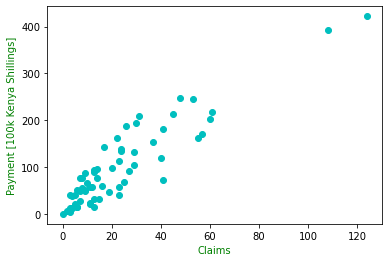

In [42]:
plot.scatter(insurance_df.claims, insurance_df.payment, color='c')
plot.xlabel('Claims', color='g')
plot.ylabel('Payment [100k Kenya Shillings]', color='g')
plot.show()

We can see that the data looks broadly linear and a linear regression should be appropriate for this data.

### Fitting the Linear Regression Model

To fit the model using statsmodels we first separate our target variable (Y) and independent variables (X).

statsmodels by default fits models without an intercept which can be useful if we know that our model should pass through zero. Here however we want to fit an intercept as well as a slope so must add in a constant term using the function stats.add_constant (This column is added to our X column as it is used when solving OLS problems with matrix algebra).

In [17]:
Y_insurance = insurance_df.payment
X_insurance = stats.add_constant(insurance_df['claims'])

We then create an instance of the class stats.OLS which encompasses our Ordinary Least Squares algorithm, with our training data. We fit the model using the .fit() method, which returns a results class that we call here results_insurance.

In [18]:
model_insurance = stats.OLS(Y_insurance, X_insurance)
results_insurance = model_insurance.fit()

We can then see our results including all the metrics using the .summary() method on our results class.

In [19]:
print(results_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           2.05e-25
Time:                        12:23:41   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

We can extract explicitly our parameter values for the intercept $\theta_{0}$ and slope $\theta_{1}$ using the attribute .params and the sum of square residuals using the property .ssr. Both of these are attributes of the results class: results_insurance.

In [20]:
intercept_insurance = results_insurance.params[0]
claims_coeff = results_insurance.params[1]
ssr_insurance = results_insurance.ssr

print('The intercept value is {:.3f}'.format(intercept_insurance))
print('The coefficient (slope) for the claims independent variable is {:.3f}'.format(claims_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_insurance))

The intercept value is 19.994
The coefficient (slope) for the claims independent variable is 3.414
The sum of square residuals is 78796.7


### Plotting Results
We can also plot our fitted model using matplotlib. We use our model parameters found above to produce our best fit line of the form $y=\theta_{0}+\theta_{1}x$. Here we create a regular array of X-values, called x_synthetic, with values spanning the range of our observed X-values. We can use this to visualise our line of best fit by calculating the predicted values for these X-values and plotting the subsequent line.

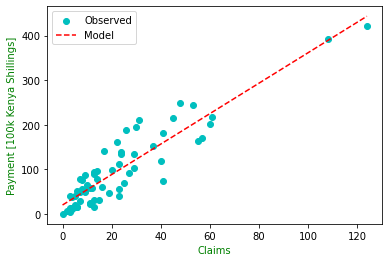

In [43]:
x_synthetic = np.linspace(0,insurance_df.claims.max(), 50)
y_pred_insurance = claims_coeff*x_synthetic + intercept_insurance
plot.scatter(insurance_df.claims, insurance_df.payment, color='c', label='Observed')
plot.plot(x_synthetic, y_pred_insurance, color='r', ls='--', label='Model')
plot.xlabel('Claims', color='g')
plot.ylabel('Payment [100k Kenya Shillings]', color='g')
plot.legend()
plot.show()

We can see that our best fit line well describes the trend of the data.